# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [61]:
# Code block for important and creating data sets. Add more code blocks if needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('car_prices.xlsx')

# Checking datastructure
display(data)

# Defining features and response variable 
X = data.drop("Price (DKK)", axis=1)
y = data["Price (DKK)"]

# Dropping "All wheel drive" because of error in the hand-in
X = X.drop(columns=['All-Wheel Drive (AWD)'])

# Splitting data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# Step 2: Scaling target variable (y) - fit only on y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)) 
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))  

# Converting X_train and X_test back to DataFrames for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Checking if data is correctly imported
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape} \n")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape} \n")

,Price (DKK),Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,Rear-Wheel Drive,All-Wheel Drive (AWD),Front-Wheel Drive
0,199900,2024,3000,270,39.0,168,780,147,7.9,144,1000,250720,5,0,0,1
1,455555,2024,1001,536,82.0,177,780,408,4.9,180,1800,462900,5,0,1,0
2,309900,2024,4000,460,64.8,162,780,204,7.8,167,750,345620,5,0,0,1
3,425362,2024,10,550,76.6,153,780,286,6.7,180,1000,395615,5,1,0,0
4,749900,2024,0,505,99.8,228,780,384,5.3,200,2500,745520,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,414000,2023,12000,514,70.0,173,780,534,3.7,250,1600,452216,5,0,1,0
6222,289000,2021,90000,469,78.0,193,780,408,4.7,210,1500,395420,5,0,1,0
6223,385000,2023,11000,450,66.0,170,780,286,6.0,190,1600,475675,5,1,0,0
6224,109900,2017,90000,280,28.0,115,780,120,9.9,165,1000,279994,5,0,0,1


X_train shape: (4980, 14), X_test shape: (1246, 14) 

y_train shape: (4980,), y_test shape: (1246,) 



## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.

In [62]:
# Adding 1's in first column to account for the intercept
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled] 

# Converting y_train to a NumPy array, as a column vector
y_train_np = y_train_scaled.reshape(-1, 1)  

# Solving B using the normal equation
XT_X = X_b.T @ X_b  # Calculating X transposed with X
XT_X_inv = np.linalg.inv(XT_X)  # Finding the inverse of X^T * X
XT_y = X_b.T @ y_train_np  # Multiplying X transposed with y
B = XT_X_inv @ XT_y  # Calculating B by multiplying the inverse of X^T*X with X^T*y

# Converting coefficients to a more readable table
feature_names = ["Intercept"] + list(X_train_scaled.columns)  
coefficients = {feature_names[i]: B[i, 0] for i in range(len(feature_names))}
coef_df = pd.DataFrame(coefficients.items(), columns=["Feature", "Coefficient"])

# Formating coefficienterne to 4 decimals
coef_df["Coefficient"] = coef_df["Coefficient"].apply(lambda x: f"{x:.4f}")

display(coef_df)



,Feature,Coefficient
0,Intercept,-0.0000
1,Model Year,0.1680
2,Mileage (km),-0.1032
3,Electric Range (km),0.0706
4,Battery Capacity (kWh),0.0054
5,Energy Consumption (Wh/km),0.0182
6,Annual Road Tax (DKK),-0.0627
7,Horsepower (bhp),0.0180
8,0-100 km/h (s),0.0770
9,Top Speed (km/h),0.0256


Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 1 - Compute predictions
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled] 

# Compute predictions (result in scaled format)
y_pred_scaled = X_test_b @ B  

# Convert back to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Flatten arrays
y_pred = y_pred.flatten()

print(f"y_test shape: {y_test_scaled.shape}, y_pred shape: {y_pred.shape}")

# Step 2 - Compute MSE and RMSE
mse = mean_squared_error(y_test_original, y_pred)  
rmse = np.sqrt(mse)

# Step 3 - Compute R-squared (R²)
r2 = r2_score(y_test_original, y_pred)

# Print results
print(f"Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

y_test shape: (1246, 1), y_pred shape: (1246,)
Model Evaluation:
Mean Squared Error (MSE): 2,774,486,707.59
Root Mean Squared Error (RMSE): 52,673.40
R-squared (R²): 0.8644


#### Interpreting the results

To evaluate the performance of the model, three key metrics where computed:

- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted prices. Lower is better.
- **Root Mean Squared Error (RMSE):** The square root of MSE, making it easier to interpret in the original price scale.
- **R-squared (R²):** Indicates how much of the variance in car prices the model explains. A value close to 1 means a strong fit.

The results show that the model captures a significant portion of the variance, with an R² score close to 1. The MSE and RMSE values provide insight into the model's predictive accuracy, indicating that it performs well. However, further evaluation in later tasks will determine if regularization improves the results.


# Part 2: Using Library Functions

### Task 3: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


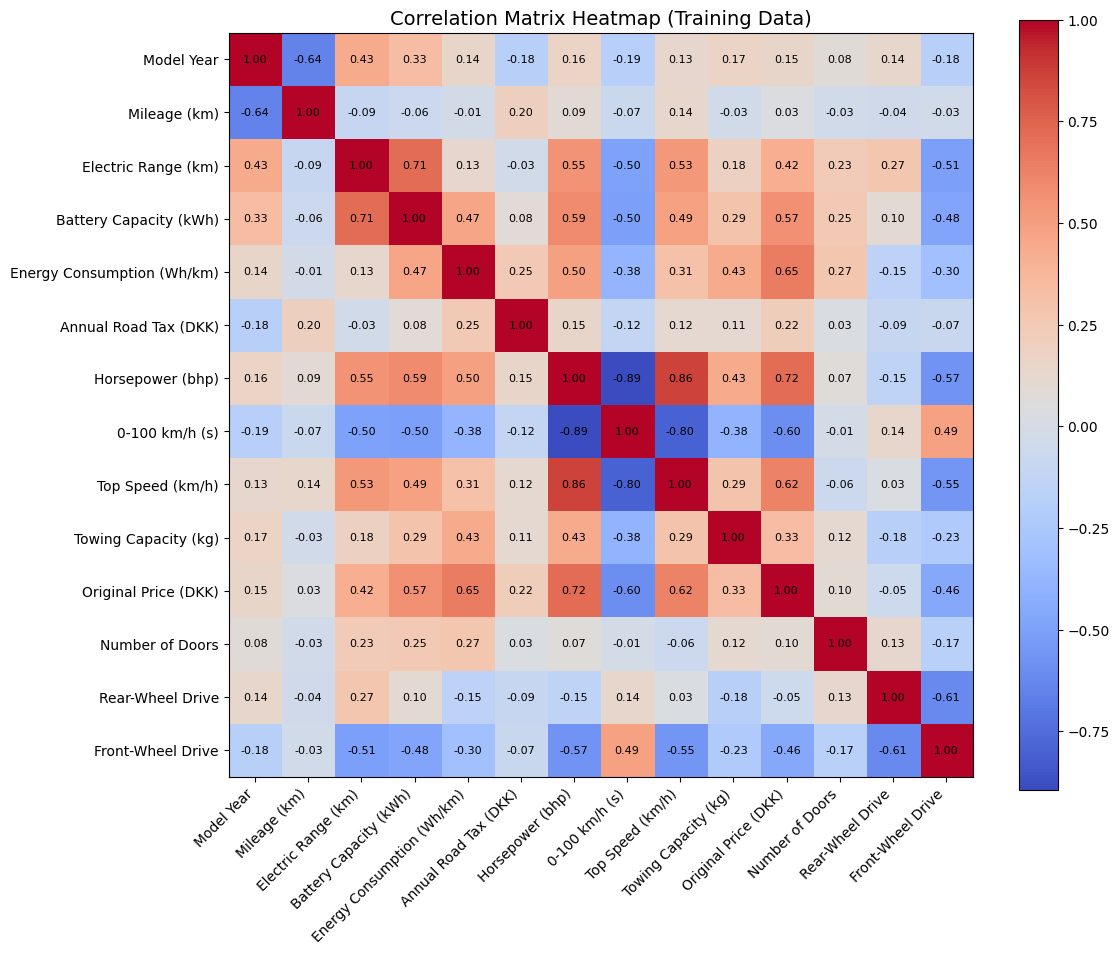

In [64]:
# Step 1 - Creating the correlation matrix and heat map

# Convert X_train_scaled back to DataFrame to keep feature names
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Compute correlation matrix
corr_matrix = X_train_df.corr()
corr_features = corr_matrix.columns

# Plot heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.imshow(corr_matrix, cmap="coolwarm", interpolation='nearest')

# Add color bar
plt.colorbar(cax)

# Add feature labels
ax.set_xticks(np.arange(len(corr_features)))
ax.set_xticklabels(corr_features, rotation=45, ha="right", fontsize=10)
ax.set_yticks(np.arange(len(corr_features)))
ax.set_yticklabels(corr_features, fontsize=10)

# Place correlation values on the heatmap
for i in range(len(corr_features)):
    for j in range(len(corr_features)):
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", fontsize=8)

plt.title("Correlation Matrix Heatmap (Training Data)", fontsize=14)
plt.show()


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2 - OLS (Ordinary Least Squares Regression)

# Creating a Linear regression model
ols = LinearRegression(fit_intercept=True)

# Adding polynomial transformer (degree=1 keeps it linear)
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_scaled) 

# Fitting model to training data
ols.fit(X_train_poly, y_train_scaled)

# Getting intercept and coefficients
intercept = ols.intercept_
coef = ols.coef_

# Printing results
print("OLS Intercept: ", intercept)
print("OLS Coefficients: ", coef)

# Evaluating model performance on test set
X_test_poly = poly.transform(X_test_scaled)  
y_pred_scaled = ols.predict(X_test_poly)  

# Convert predictions back to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Compute MSE, RMSE, and R²
mse_ols = mean_squared_error(y_test_original, y_pred)
rmse_ols = np.sqrt(mse_ols)
r2_ols = r2_score(y_test_original, y_pred)

# Print evaluation metrics
print(f"OLS Model Evaluering:")
print(f"Mean Squared Error (MSE): {mse_ols:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ols:,.2f}")
print(f"R-squared (R²): {r2_ols:.4f}")


OLS Intercept:  [-7.67903177e-15]
OLS Coefficients:  [[ 0.          0.16797777 -0.10321027  0.07060633  0.00538743  0.01816163
  -0.06272769  0.01798803  0.07702223  0.02558098  0.04749138  0.8500388
   0.01114868  0.04087488  0.00483223]]
OLS Model Evaluering:
Mean Squared Error (MSE): 2,774,486,707.59
Root Mean Squared Error (RMSE): 52,673.40
R-squared (R²): 0.8644


#### Real-World Meaning of RMSE and \( R^2 \)

##### Root Mean Squared Error (RMSE)
- **RMSE = 52,673.40 DKK**, meaning the model's predictions deviate by ~52,673 DKK on average.
- A lower RMSE would indicate more precise predictions.

##### R-squared (\( R^2 \))
- **\( R^2 = 86.4\% \)**, meaning the model explains **86.4% of price variation**.
- The remaining **13.6% of variation** is unexplained, indicating room for improvement.

##### Conclusion
While the model performs well, **it may not be precise enough for accurate price estimation**.


### Task 5: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

In [66]:
from sklearn.linear_model import RidgeCV, Ridge

# Data is already pre-scaled
print("Performing Ridge Regression")

# Step 1: RidgeCV to find optimal alpha
ridge_cv = RidgeCV(alphas=np.linspace(1, 1000, 1000))
ridge_cv.fit(X_train_scaled, y_train_scaled) 

# Print optimal alpha
print(f"Optimal Ridge alpha: {ridge_cv.alpha_:.4f}")

# Step 2: Fit Ridge Regression with best alpha
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train_scaled, y_train_scaled)

# Step 3: Compute predictions in scaled format
y_pred_train_scaled = ridge.predict(X_train_scaled)
y_pred_test_scaled = ridge.predict(X_test_scaled)

# Convert predictions back to original scale
y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()
y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Step 4: Compute MSE, RMSE, and R²
mse_ridge_train = mean_squared_error(y_train_original, y_pred_train)
mse_ridge_test = mean_squared_error(y_test_original, y_pred_test)
rmse_ridge_train = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
ridge_score_train = r2_score(y_train_original, y_pred_train)
ridge_score_test = r2_score(y_test_original, y_pred_test)

# Print results with better formatting
print(f"Ridge Regression Evaluering:")
print(f"MSE: {mse_ridge_train:,.2f} (train), {mse_ridge_test:,.2f} (test)")
print(f"RMSE: {rmse_ridge_train:,.2f} (train), {rmse_ridge_test:,.2f} (test)")
print(f"R² score: {ridge_score_train:.4f} (train), {ridge_score_test:.4f} (test)")


Performing Ridge Regression
Optimal Ridge alpha: 46.0000
Ridge Regression Evaluering:
MSE: 2,163,918,606.00 (train), 2,786,591,500.29 (test)
RMSE: 46,517.94 (train), 52,788.18 (test)
R² score: 0.9024 (train), 0.8638 (test)


In [67]:
from sklearn.linear_model import LassoCV, Lasso

# Data is already pre-scaled
print("Performing Lasso Regression")

# Step 1: Find optimal alpha med cross-validation
lasso_cv = LassoCV(alphas=np.linspace(0.001, 10, 100), cv=5)
lasso_cv.fit(X_train_scaled, y_train_scaled.ravel())

# Print optimal alpha
print(f"Optimal Lasso alpha: {lasso_cv.alpha_:.4f}")

# Step 2: Fit Lasso Regression med optimal alpha
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train_scaled, y_train_scaled.ravel())

# Step 3: Compute predictions (in scaled format)
y_pred_train_scaled = lasso.predict(X_train_scaled)
y_pred_test_scaled = lasso.predict(X_test_scaled)

# Convert predictions back to original scale
y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()
y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Step 4: Compute MSE, RMSE, and R²
mse_lasso_train = mean_squared_error(y_train_original, y_pred_train)
mse_lasso_test = mean_squared_error(y_test_original, y_pred_test)
rmse_lasso_train = np.sqrt(mse_lasso_train)
rmse_lasso_test = np.sqrt(mse_lasso_test)
score_lasso_train = r2_score(y_train_original, y_pred_train)
score_lasso_test = r2_score(y_test_original, y_pred_test)

# Print results with better formatting
print(f"Lasso Regression Evaluering:")
print(f"MSE: {mse_lasso_train:,.2f} (train), {mse_lasso_test:,.2f} (test)")
print(f"RMSE: {rmse_lasso_train:,.2f} (train), {rmse_lasso_test:,.2f} (test)")
print(f"R² score: {score_lasso_train:.4f} (train), {score_lasso_test:.4f} (test)")


Performing Lasso Regression
Optimal Lasso alpha: 0.0010
Lasso Regression Evaluering:
MSE: 2,160,805,693.74 (train), 2,764,472,231.04 (test)
RMSE: 46,484.47 (train), 52,578.25 (test)
R² score: 0.9025 (train), 0.8649 (test)


In [68]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

# Data is already pre-scaled
print("Performing Elastic Net Regression")

# Step 1: Find optimal alpha med cross-validation
elastic_cv = ElasticNetCV(alphas=np.linspace(0.001, 10, 100), cv=5)
elastic_cv.fit(X_train_scaled, y_train_scaled.ravel()) 

# Print optimal alpha
print(f"Optimal Elastic Net alpha: {elastic_cv.alpha_:.4f}")

# Step 2: Fit Elastic Net Regression med optimal alpha
elasticNet = ElasticNet(alpha=elastic_cv.alpha_)
elasticNet.fit(X_train_scaled, y_train_scaled.ravel())

# Step 3: Compute predictions (in scaled format)
y_pred_train_scaled = elasticNet.predict(X_train_scaled)
y_pred_test_scaled = elasticNet.predict(X_test_scaled)

# Convert predictions back to original scale
y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()
y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Step 4: Compute MSE, RMSE, and R²
mse_elastic_train = mean_squared_error(y_train_original, y_pred_train)
mse_elastic_test = mean_squared_error(y_test_original, y_pred_test)
rmse_elastic_train = np.sqrt(mse_elastic_train)
rmse_elastic_test = np.sqrt(mse_elastic_test)
score_elastic_train = r2_score(y_train_original, y_pred_train)
score_elastic_test = r2_score(y_test_original, y_pred_test)

# Print results with better formatting
print(f"Elastic Net Regression Evaluering:")
print(f"MSE: {mse_elastic_train:,.2f} (train), {mse_elastic_test:,.2f} (test)")
print(f"RMSE: {rmse_elastic_train:,.2f} (train), {rmse_elastic_test:,.2f} (test)")
print(f"R² score: {score_elastic_train:.4f} (train), {score_elastic_test:.4f} (test)")


Performing Elastic Net Regression
Optimal Elastic Net alpha: 0.0010
Elastic Net Regression Evaluering:
MSE: 2,160,430,549.07 (train), 2,769,678,154.33 (test)
RMSE: 46,480.43 (train), 52,627.73 (test)
R² score: 0.9025 (train), 0.8647 (test)


#### Discussion & Conclusion

I tested multiple regression models to predict car prices and compared their performance.

- **OLS Regression** provides a baseline but can be sensitive to noise.
- **Ridge Regression** reduces variance and improves generalization.
- **Lasso Regression** helps with feature selection but may remove too many variables.
- **Elastic Net Regression** balances Ridge and Lasso, making it robust.

Among the tested models, **Ridge and Elastic Net** provided the best results, as they effectively reduced overfitting while maintaining predictive accuracy. Future improvements could involve testing polynomial regression, feature engineering, and larger datasets to further enhance performance.
